# Week 6 - Class 6

This notebook have the most important exercises for theoretical classes 4 and 5, which covers chapter 2,3,4, and 5 from the book. The labs from https://github.com/fchollet/deep-learning-with-python-notebooks are a guide for this notebook, mainly the labs 2,3,4,5. 

It will be covered:
### Part 1:
- Basic neural network
- Selecting data
- Tensor operations
- Full implementation of a NN in Keras (not mandatory)
### Part 2:
- Linear classifier (not mandatory)
- Movies Reviews - binary classsification-
- Houses price - regression and k-fold validation-
### Part 3:
- Machine Learning flow: overfitting and generalization

# Part 1

In [20]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [21]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

1.1 
Check the dimensions of train and test images and labels

In [22]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


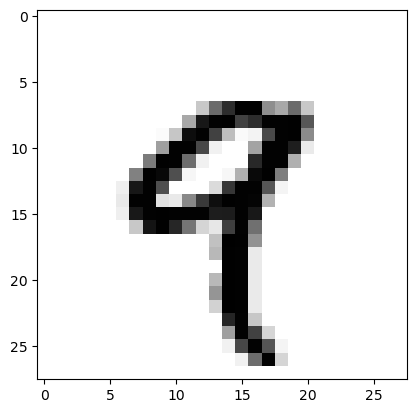

In [23]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [24]:
train_labels[4]

9

- Basic Neural Network 

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [26]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [28]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2539 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0502 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9886


1.2
Make model prediction for the first 10 test images

Check if the prediction is the same as the label and plot the test image

In [29]:
# predict the model
[np.argmax(i) for i in model.predict(test_images[0:10])]

1/1 [==============================] - 0s 19ms/step


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [30]:
# check the test label
test_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

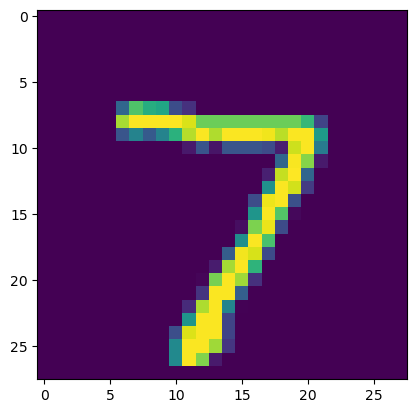

In [32]:
# plot the image
(train_imagesP, train_labelsP), (test_imagesP, test_labelsP) = mnist.load_data()
plt.imshow(test_imagesP[0])

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 535us/step - loss: 0.0655 - accuracy: 0.9810
test_acc: 0.9810000061988831


- Selecting data

In [ ]:
#this is an example of what this batch iterator does
n = 3
batch = train_images[128 * n :  128 * (n + 1)]

In [ ]:
#this is an example of a simple iterator

class MyNumbers:
  def __iter__(self):
    self.a = 1
    return self

  def __next__(self):
    x = self.a
    self.a += 1
    return x

In [ ]:
nub=MyNumbers()

In [ ]:
next(nub)

In [34]:
import math
# a class to generate iterate over objects= iterator
#this one iterates over samples, builds the batches
#notice it saves the index (what we need to retrive the next X images)
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0 #this are attributes (self.) and can be seen after instanciate
        self.images = images 
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size #this saved a for loop in the implementation code
        return images, labels

In [35]:
#implementation
(train_imagesB, train_labelsB), (test_imagesB, test_labelsB) = mnist.load_data()

batch_generator = BatchGenerator(train_imagesB, train_labelsB)

#check the batch_size of the batch_generator
<your-answer>

In [ ]:
#run this
for batch_counter in range(batch_generator.num_batches):
    images_batch, labels_batch = batch_generator.next()

#print the size of images_batch, is it the same as batch_size?
<your-answer>

1.4 
Complete the naive_relu function

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0) #<your-answer>
    return x

- Full implementation 

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [ ]:
#4
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
#4
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [ ]:
#3
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
#2
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")


In [ ]:
#1
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

1.5 
Organize the code of the full implementation in modules

- Liner classifier

In [44]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
    
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [45]:
# Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [46]:
# Generating the corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

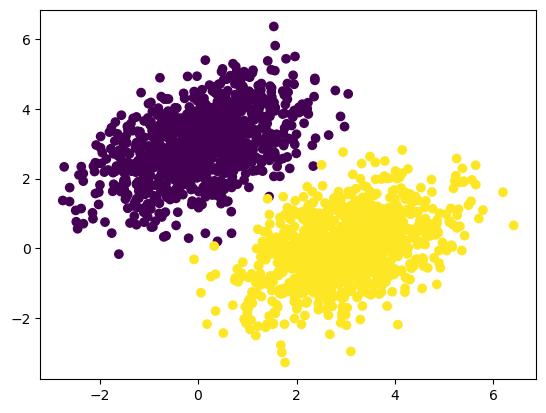

In [47]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [48]:
model = keras.Sequential([keras.layers.Dense(1)])

model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

#or:

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [49]:
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

In [50]:
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 945us/step - loss: 6.6634 - binary_accuracy: 0.7114 - val_loss: 5.9608 - val_binary_accuracy: 0.7283
Epoch 2/5
88/88 [==============================] - 0s 500us/step - loss: 5.2285 - binary_accuracy: 0.7729 - val_loss: 4.6828 - val_binary_accuracy: 0.8017
Epoch 3/5
88/88 [==============================] - 0s 485us/step - loss: 4.0781 - binary_accuracy: 0.8279 - val_loss: 3.6228 - val_binary_accuracy: 0.8767
Epoch 4/5
88/88 [==============================] - 0s 468us/step - loss: 3.1326 - binary_accuracy: 0.8729 - val_loss: 2.7739 - val_binary_accuracy: 0.9150
Epoch 5/5
88/88 [==============================] - 0s 476us/step - loss: 2.3393 - binary_accuracy: 0.9071 - val_loss: 2.0363 - val_binary_accuracy: 0.9383


In [51]:
# see the batch size needed on predictions
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])


5/5 [==============================] - 0s 434us/step
[[-0.13467053]
 [-1.3781105 ]
 [ 1.7086599 ]
 [-0.4536884 ]
 [ 1.8985438 ]
 [-1.3032283 ]
 [-1.5763979 ]
 [-0.6845192 ]
 [ 1.3581355 ]
 [ 1.0586162 ]]


# Part 2

- Movies Reviews - binary classsification-

In [52]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


In [53]:
#funtions
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
    
#data wrangling (from last lab)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [54]:

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

2.1 
Build a model with:

    - 3 sequential dense layers (2 relu and last one sigmoid)
    
    - Dense layer size is 16

In [ ]:
#see the example of a basic neural network in this notebook (1.1)

model = <your-answer>

In [ ]:
model.compile(optimizer="rmsprop",
              loss=<your-answer>,
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict = history.history
history_dict.keys()


In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)


In [ ]:
model.predict(x_test)


- Houses price - regression and k-fold validation-

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

1. Normalizing the data

Notice the training and testing normalization

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

2. Build model

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

3. Validate (K fold validation)

In [ ]:
# Which variable is x1 and x2? Choose their values 

x1 = <your-answer>
num_val_samples = len(train_data) // k
x2 = <your-answer>
all_scores = []
for i in range(x1):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=x2, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(x1):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=x2, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(x2)]

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
# Is this a good MAE? 
test_mae_score

In [ ]:
predictions = model.predict(test_data)
predictions[0]

# Part 3

Machine Learning flow: overfitting and generalization

1. Have a baseline with a very simplistic model 
2. Find a simple model that overfitts
3. Apply generalization techniques, such as:
    - Learning rate
    - L1 and L2 regularization
    - Dropout

3.1 BASELINE: Apply a logistic regression for the MNIST problem

In [ ]:
#load the MNIST dataset
<your-answer>
(train_images, train_labels), _ = mnist.load_data()

In [ ]:
train_images.shape

In [ ]:
# reshape the tensors to 2D
<your-answer>
train_images = train_images.reshape((60000, 28 * 28))

# scale it by the maximum pixel value
<your-answer>
train_images = train_images.astype("float32") / 255

In [ ]:
# create a keras model of multinomial logistic regression
# http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/

#<your-answer>
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

# run again with LR=1e-2, compare the results

In [ ]:
import matplotlib.pyplot as plt

# your y is the validation loss
# see the varianles of history_small_model.history.keys() and choose the right one
val_loss = history_small_model.history[<your-answer>]
#your x is the number of epochs
epochs = range(1, 21)
#use the plot funtion to have the validation loss per epoch
<your-answer>

plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
         
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
val_loss = history_large_model.history['val_loss']
#your x is the number of epochs
epochs = range(1, 21)
#use the plot funtion to have the validation loss per epoch
#<your-answer>

plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
         
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(96, 
                kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                activation="relu"),
    layers.Dense(96, 
                kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
history_large_modelReg = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
model = keras.Sequential([
    layers.Dense(96,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(96,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
history_large_modelReg = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)